# What is the best sailing week for Lake Mendota?

Lake Mendota is an inland lake that forms the morthern border of the city of Madison, WI. It has great small-boat sailing during the summer. I want to find the week that has had the best sailing weather over the past several years.

Find the week with the largest fraction of daylight hours with:
* Air temperature between 60F & 90F
* Steady wind speeds 10-18mph

During that week, the wind must not be from the southern quadrant (SW-SE) more than 30% of the time

# Data from Mendota Buoy

Data are hosted online at UW's Space Science & Engineering Center: http://metobs.ssec.wisc.edu/data_download/

Example API requests at https://metobs-test.ssec.wisc.edu/api/data#Example%20Queries

Base API URL: `http://metobs.ssec.wisc.edu/api/data.<fmt>`

Start by using one of those examples: the tower & buoy temp for 2016-07-11

In [1]:
import numpy as np, matplotlib.pyplot as plt
import pandas as pd

In [38]:
dfmt = 'csv'
ssec_base_url = 'http://metobs.ssec.wisc.edu/api/data'

symbols=['aoss.tower.air_temp', 'mendota.buoy.air_temp']
begindate, begintime = '2020-07-11', '00:00:00'
enddate, endtime = '2020-07-11', '23:59:59'
interval = '5m'

towerbuoy_q = '&'.join((
    'symbols={}'.format(':'.join(symbols)),
    'begin={}T{}'.format(begindate, begintime),
    'end={}T{}'.format(enddate, endtime),
    'interval={}'.format(interval)))

df = pd.read_csv('{}.{}?{}'.format(ssec_base_url, dfmt, towerbuoy_q), header=None, skiprows=5,
                 names=['datetime', *symbols])
df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime,aoss.tower.air_temp,mendota.buoy.air_temp
0,2020-07-11 00:00:00+00:00,26.4,27.0
1,2020-07-11 00:05:00+00:00,26.4,26.9
2,2020-07-11 00:10:00+00:00,26.3,26.9
3,2020-07-11 00:15:00+00:00,26.3,26.9
4,2020-07-11 00:20:00+00:00,26.2,26.8
...,...,...,...
283,2020-07-11 23:35:00+00:00,27.0,27.4
284,2020-07-11 23:40:00+00:00,26.9,27.3
285,2020-07-11 23:45:00+00:00,26.9,27.2
286,2020-07-11 23:50:00+00:00,26.9,27.2


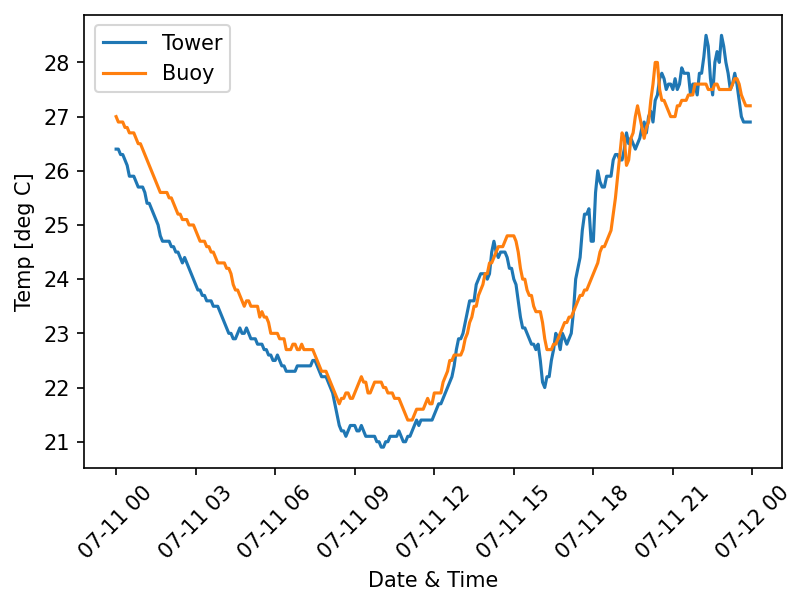

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=150)
ax.plot(df['datetime'], df['aoss.tower.air_temp'], label='Tower')
ax.plot(df['datetime'], df['mendota.buoy.air_temp'], label='Buoy')
ax.legend()
ax.set_xlabel('Date & Time')
ax.set_ylabel('Temp [deg C]')
ax.tick_params('x', rotation=45.)

Expand query to a large range of dates, and more data

In [75]:
def ssec_query(symbols, begindate, begintime, enddate, endtime, interval):
    dfmt = 'csv'
    ssec_base_url = 'http://metobs.ssec.wisc.edu/api/data'

    ssec_q = '&'.join((
        'symbols={}'.format(':'.join(symbols)),
        'begin={}T{}'.format(begindate, begintime),
        'end={}T{}'.format(enddate, endtime),
        'interval={}'.format(interval)))
    
    print(ssec_q)

    df = pd.read_csv('{}.{}?{}'.format(ssec_base_url, dfmt, ssec_q), header=None, skiprows=5,
                     names=['datetime', *symbols])
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    return df

def ssec_query_year(symbols, year, interval):
    begindate = '{}-01-01'.format(year)
    enddate = '{}-12-31'.format(year)
    begintime = '00:00:00'
    endtime = '23:59:59'
    
    return ssec_query(symbols=symbols, interval=interval,
                      begindate=begindate, begintime=begintime,
                      enddate=enddate, endtime=endtime)

In [338]:
q_symbols = ['mendota.buoy.air_temp', 'mendota.buoy.wind_speed', 'mendota.buoy.gust', 'mendota.buoy.wind_direction',
             'aoss.tower.air_temp', 'aoss.tower.wind_speed', 'aoss.tower.accum_precip', 'aoss.tower.wind_direction']

buoydf = pd.concat(
    [ssec_query_year(symbols=q_symbols, year=yr, interval='1h')
     for yr in range(2010, 2021)])

symbols=mendota.buoy.air_temp:mendota.buoy.wind_speed:mendota.buoy.gust:mendota.buoy.wind_direction:aoss.tower.air_temp:aoss.tower.wind_speed:aoss.tower.accum_precip:aoss.tower.wind_direction&begin=2010-01-01T00:00:00&end=2010-12-31T23:59:59&interval=1h
symbols=mendota.buoy.air_temp:mendota.buoy.wind_speed:mendota.buoy.gust:mendota.buoy.wind_direction:aoss.tower.air_temp:aoss.tower.wind_speed:aoss.tower.accum_precip:aoss.tower.wind_direction&begin=2011-01-01T00:00:00&end=2011-12-31T23:59:59&interval=1h
symbols=mendota.buoy.air_temp:mendota.buoy.wind_speed:mendota.buoy.gust:mendota.buoy.wind_direction:aoss.tower.air_temp:aoss.tower.wind_speed:aoss.tower.accum_precip:aoss.tower.wind_direction&begin=2012-01-01T00:00:00&end=2012-12-31T23:59:59&interval=1h
symbols=mendota.buoy.air_temp:mendota.buoy.wind_speed:mendota.buoy.gust:mendota.buoy.wind_direction:aoss.tower.air_temp:aoss.tower.wind_speed:aoss.tower.accum_precip:aoss.tower.wind_direction&begin=2013-01-01T00:00:00&end=2013-12-31T23:59

No handles with labels found to put in legend.


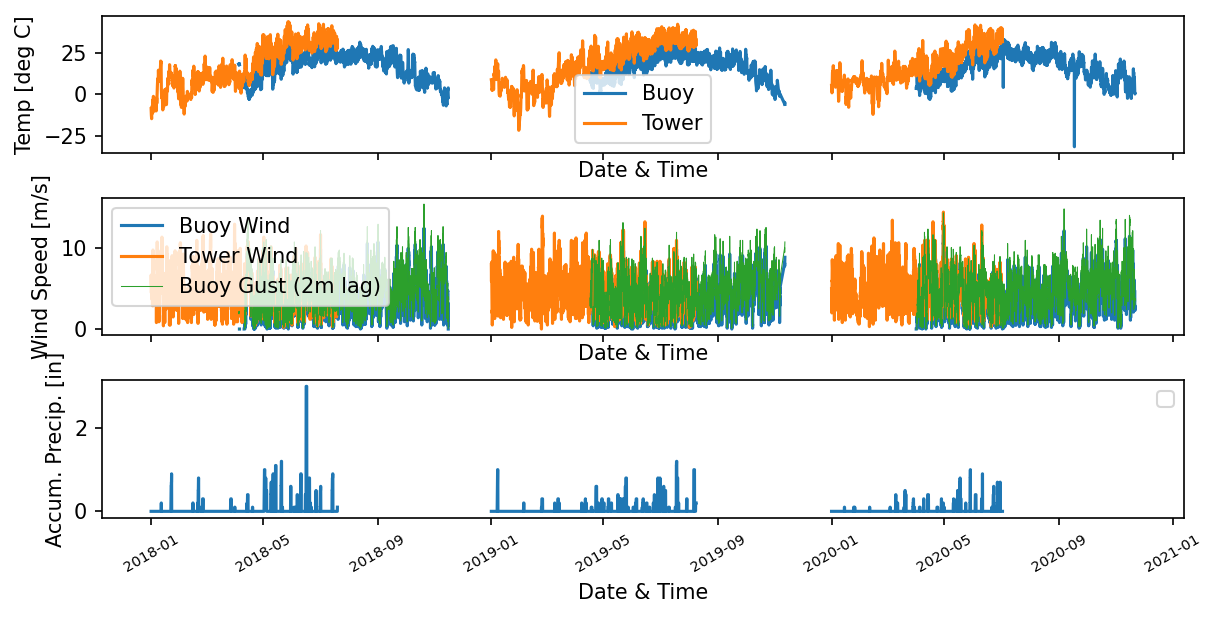

In [339]:
fig, axs = plt.subplots(3, 1, figsize=(8, 4), dpi=150, constrained_layout=True, sharex=True)
axs[0].plot(buoydf['datetime'], buoydf['mendota.buoy.air_temp'], label='Buoy')
axs[0].plot(buoydf['datetime'], buoydf['aoss.tower.air_temp'] + 10., label='Tower')

axs[0].set_xlabel('Date & Time')
axs[0].set_ylabel('Temp [deg C]')
axs[0].tick_params('x', rotation=30., labelsize='x-small')
axs[0].legend()

axs[1].plot(buoydf['datetime'], buoydf['mendota.buoy.wind_speed'], label='Buoy Wind')
axs[1].plot(buoydf['datetime'], buoydf['aoss.tower.wind_speed'], label='Tower Wind')
axs[1].plot(buoydf['datetime'], buoydf['mendota.buoy.gust'], label='Buoy Gust (2m lag)', linewidth=0.5)
axs[1].set_xlabel('Date & Time')
axs[1].set_ylabel('Wind Speed [m/s]')
axs[1].tick_params('x', rotation=30., labelsize='x-small')
axs[1].legend()

axs[2].plot(buoydf['datetime'], buoydf['aoss.tower.accum_precip'])
axs[2].set_xlabel('Date & Time')
axs[2].set_ylabel('Accum. Precip. [in]')
axs[2].tick_params('x', rotation=30., labelsize='x-small')
axs[2].legend()

Next, find the sunrise and sunset time for each day; filter out all non-daylight measurements, since we can't sail at night! We will be evaluating whether weeks are good or not relative to the amount of daylight hours.

In [340]:
buoydf['week'] = buoydf['datetime'].dt.isocalendar().week
buoydf['year'] = buoydf['datetime'].dt.year
buoydf['yearweek'] = ['{}-{}'.format(y, w) for y, w in zip(buoydf['year'], buoydf['week'])]

In [342]:
sun = Sun(43.0731, -89.4012)

buoydf['sunrisetime'] = [sun.get_local_sunrise_time(dt.date())
                         for dt in buoydf['datetime'].dt.to_pydatetime()]
buoydf['sunsettime'] = [sun.get_local_sunset_time(dt.date())
                         for dt in buoydf['datetime'].dt.to_pydatetime()]
buoydf['isdaytime'] = (buoydf['sunrisetime'] < buoydf['datetime']) * (buoydf['datetime'] < buoydf['sunsettime'])

print('{:d} daytime / {:d} nighttime measurements'.format(buoydf['isdaytime'].sum(), (~buoydf['isdaytime']).sum()))

buoydf = buoydf.loc[buoydf['isdaytime']]

3852 daytime / 18789 nighttime measurements


Aggregate wind speeds and directions from tower & buoy. For wind direction, this needs circular statistics, which entails averaging the sines and cosines of wind angles and then inverting back to an angle.

In [343]:
def mean_or_nonnan(x1, x2):
    m = np.zeros_like(x1)
    
    x1_fin = np.isfinite(x1)
    x2_fin = np.isfinite(x2)
    
    m[x1_fin & x2_fin] = np.mean([x1, x2], axis=0)[x1_fin & x2_fin]
    m[x1_fin & ~x2_fin] = x1[x1_fin & ~x2_fin]
    m[~x1_fin & x2_fin] = x2[~x1_fin & x2_fin]
    m[~x1_fin & ~x2_fin] = np.nan
    
    return m

buoydf['airtemp'] = mean_or_nonnan(buoydf['aoss.tower.air_temp'], buoydf['mendota.buoy.air_temp'])
buoydf['windspeed'] = mean_or_nonnan(buoydf['aoss.tower.wind_speed'], buoydf['mendota.buoy.wind_speed'])

def aver_winddir(x1, x2):
    sinx1 = np.sin(x1)
    cosx1 = np.cos(x1)
    
    sinx2 = np.sin(x2)
    cosx2 = np.cos(x2)
    
    avg_sin = np.nanmean(np.row_stack([sinx1, sinx2]), axis=0)
    avg_cos = np.nanmean(np.row_stack([cosx1, cosx2]), axis=0)
    
    return np.degrees(np.arctan2(avg_sin, avg_cos))

buoydf['winddir'] = aver_winddir(buoydf['aoss.tower.wind_direction'], buoydf['mendota.buoy.wind_direction'])

In [344]:
buoydf[['datetime', 'airtemp', 'windspeed', 'winddir']]

,datetime,airtemp,windspeed,winddir
14,2018-01-01 14:00:00+00:00,-24.7,5.2,7.100090
15,2018-01-01 15:00:00+00:00,-24.1,4.8,48.170547
16,2018-01-01 16:00:00+00:00,-23.1,4.6,-66.421012
17,2018-01-01 17:00:00+00:00,-21.9,4.3,-66.421012
18,2018-01-01 18:00:00+00:00,-20.5,4.3,-107.491469
...,...,...,...,...
7758,2020-11-20 20:00:00+00:00,10.4,5.4,170.367618
7759,2020-11-20 21:00:00+00:00,10.4,4.1,-91.266146
7760,2020-11-20 22:00:00+00:00,9.3,4.5,80.621192
7775,2020-11-21 13:00:00+00:00,0.1,2.3,65.410168


Define some functions that help us evaluate whether individual measurements were in our acceptable range.

In [345]:
def in_interval(x, mi, ma):
    return np.logical_and((x >= mi), (x < ma))

def in_outerval(x, mi, ma):
    return np.logical_or((x < mi), (x > ma))

def week_pct_good(df):
    windspeed = df['windspeed']
    windspeed_good = in_interval(windspeed, 4.5, 8.0)
    
    airtemp = df['airtemp']
    airtemp_good = in_interval(airtemp, 15.6, 32.2)
    
    return np.logical_and(windspeed_good, airtemp_good).sum() / len(df)

Group measurements by their year and week within that year, and figure out what percentage of temp. and wind measurements satisfy the criteria.

In [346]:
week_f_good = buoydf.groupby(['year', 'week']).apply(week_pct_good)
week_f_good

year  week
2018  1       0.000000
      2       0.000000
      3       0.000000
      4       0.000000
      5       0.000000
      6       0.000000
      7       0.000000
      8       0.000000
      9       0.000000
      10      0.000000
      38      0.041667
      39      0.142857
      40      0.073171
      41      0.155844
      42      0.000000
      43      0.027397
      44      0.000000
      45      0.000000
      46      0.000000
2019  1       0.000000
      2       0.000000
      3       0.000000
      4       0.000000
      5       0.000000
      6       0.000000
      7       0.000000
      8       0.000000
      9       0.000000
      10      0.000000
      11      0.000000
      38      0.285714
      39      0.511905
      40      0.204819
      41      0.246753
      42      0.000000
      43      0.000000
      44      0.000000
      45      0.000000
      46      0.000000
2020  1       0.000000
      2       0.000000
      3       0.000000
      4       0.000000


The process is different for the wind direction. We don't mind a little south wind from time to time--but we don't want a lot of it.

In [347]:
week_winddir_good = buoydf.groupby(['year', 'week'])['winddir'].apply(lambda x: (in_interval(x, -145, 145).sum() / len(x)) >= 0.7)

In [348]:
from datetime import date

In [349]:
goodtime_df = pd.DataFrame(week_f_good[week_winddir_good], columns=['goodtime']).sort_values('goodtime', ascending=False).reset_index()
goodtime_df['Monday of week'] = [date.fromisocalendar(yr, wk, 1) for (yr, wk) in zip(goodtime_df['year'], goodtime_df['week'])]
goodtime_df[:10]

,year,week,goodtime,Monday of week
0,2019,39,0.511905,2019-09-23
1,2020,39,0.369048,2020-09-21
2,2020,45,0.357143,2020-11-02
3,2020,41,0.311688,2020-10-05
4,2020,38,0.291667,2020-09-14
5,2019,38,0.285714,2019-09-16
6,2019,41,0.246753,2019-10-07
7,2019,40,0.204819,2019-09-30
8,2020,42,0.155844,2020-10-12
9,2018,41,0.155844,2018-10-08
